In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.available
style.use("seaborn-deep")

In [2]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
pd.set_option("display.max_columns", None)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
drop_features = ["id"]
df = df.drop(drop_features, axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [10]:
df.drop(df[df["smoking_status"] == "Unknown"].index, inplace=True)
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [11]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [12]:
df.drop(df[df["gender"] == "Other"].index, inplace=True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64


In [14]:
df = df.fillna(np.mean(df['bmi']))

In [15]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [16]:
from scipy.stats import norm, skew

In [18]:
data = df

In [21]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='bmi'>

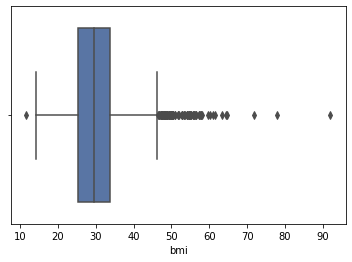

In [22]:
sns.boxplot(data.bmi)

In [23]:
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
import  random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

<AxesSubplot:xlabel='bmi'>

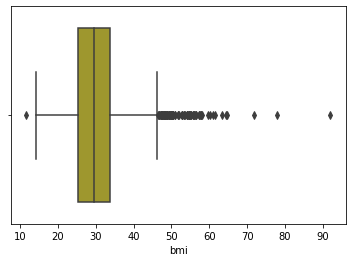

In [26]:
sns.boxplot(data.bmi,color = randomcolor())

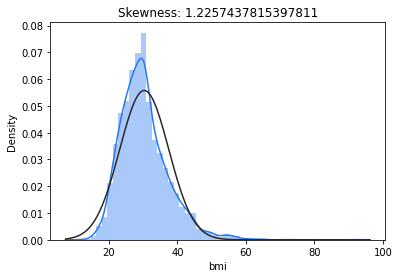

In [27]:
skewness = skew(data.bmi)
sns.distplot(data.bmi, fit = norm, color = randomcolor())
plt.title("Skewness: "+str(skewness))
plt.show()

<AxesSubplot:>

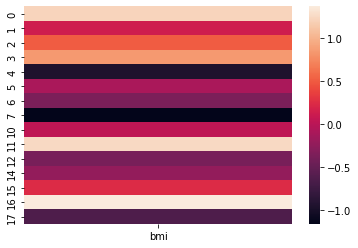

In [114]:
dataHead = df[["bmi"]].head(15)
sns.heatmap(dataHead)

In [28]:
#Outliers
outliers = data.bmi.quantile(0.997)
data.bmi = data.bmi[data.bmi<outliers]
data.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  11
smoking_status        0
stroke                0
dtype: int64

In [29]:
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:xlabel='bmi'>

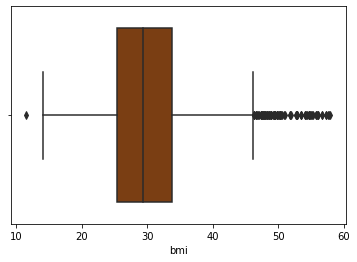

In [30]:
sns.boxplot(data.bmi,color = randomcolor())

<AxesSubplot:xlabel='bmi'>

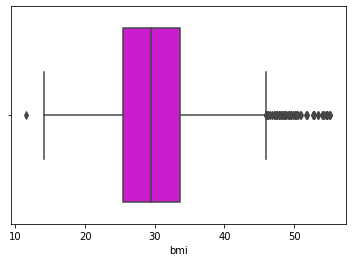

In [31]:
outliers = data.bmi.quantile(0.997)
data.bmi = data.bmi[data.bmi<outliers]
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
sns.boxplot(data.bmi,color = randomcolor())

<AxesSubplot:xlabel='bmi'>

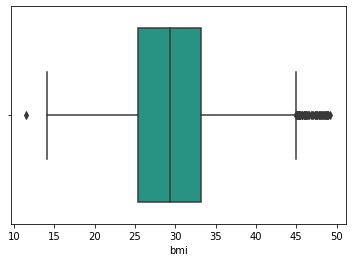

In [36]:
outliers = data.bmi.quantile(0.997)
data.bmi = data.bmi[data.bmi<outliers]
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
sns.boxplot(data.bmi,color = randomcolor())

<AxesSubplot:xlabel='bmi'>

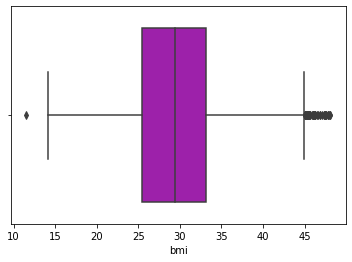

In [37]:
outliers = data.bmi.quantile(0.997)
data.bmi = data.bmi[data.bmi<outliers]
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
sns.boxplot(data.bmi,color = randomcolor())

<AxesSubplot:xlabel='bmi'>

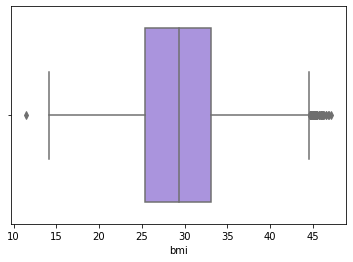

In [38]:
outliers = data.bmi.quantile(0.997)
data.bmi = data.bmi[data.bmi<outliers]
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
sns.boxplot(data.bmi,color = randomcolor())

<AxesSubplot:xlabel='bmi'>

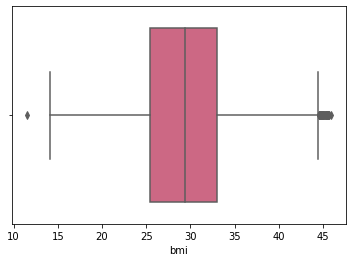

In [39]:
outliers = data.bmi.quantile(0.997)
data.bmi = data.bmi[data.bmi<outliers]
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
sns.boxplot(data.bmi,color = randomcolor())

<AxesSubplot:xlabel='bmi'>

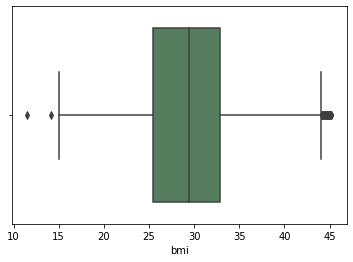

In [40]:
outliers = data.bmi.quantile(0.997)
data.bmi = data.bmi[data.bmi<outliers]
data.bmi=data.bmi.replace(np.nan, data.bmi.median())
sns.boxplot(data.bmi,color = randomcolor())

In [41]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [42]:
data.gender.value_counts()

Female    2158
Male      1407
Name: gender, dtype: int64

In [43]:
data.ever_married.value_counts()

Yes    2710
No      855
Name: ever_married, dtype: int64

In [44]:
data.work_type.value_counts()

Private          2284
Self-employed     663
Govt_job          535
children           69
Never_worked       14
Name: work_type, dtype: int64

In [45]:
data.Residence_type.value_counts()

Urban    1814
Rural    1751
Name: Residence_type, dtype: int64

In [46]:
data.smoking_status.value_counts()

never smoked       1892
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [47]:
from scipy.stats import norm, skew

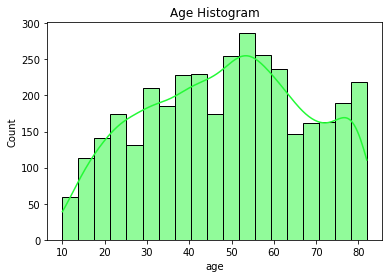

In [48]:
sns.histplot(data=data, x="age", kde=True,color = randomcolor())
plt.title("Age Histogram")
plt.show()

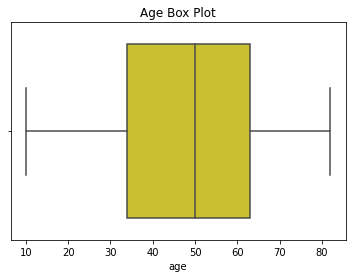

In [49]:
sns.boxplot(data=data, x="age",color = randomcolor())
plt.title("Age Box Plot")
plt.show()

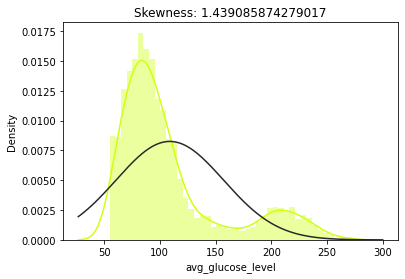

In [50]:
skewness = skew(data.avg_glucose_level)
sns.distplot(data.avg_glucose_level, fit = norm, color = randomcolor())
plt.title("Skewness: "+str(skewness))
plt.show()

In [51]:
#Preliminiary visualization of all categorical data

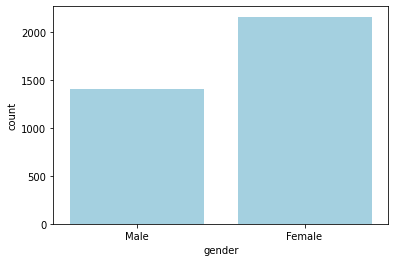

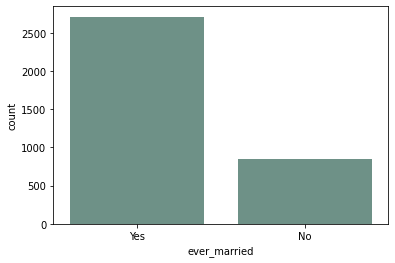

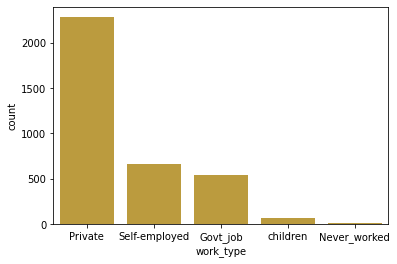

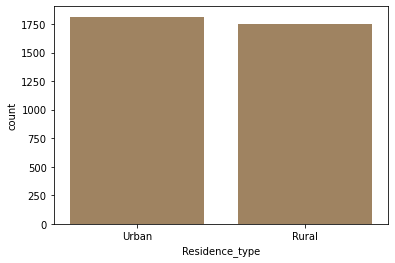

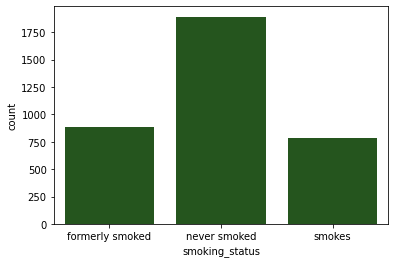

In [52]:
for x in data.select_dtypes(include=['object']).columns:
    sns.countplot(data[x],color = randomcolor())
    plt.show()

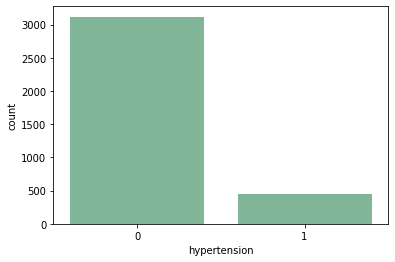

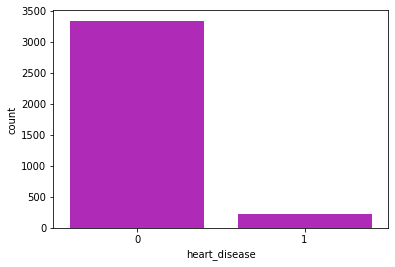

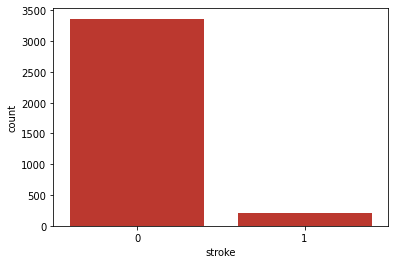

In [53]:
for x in ['hypertension','heart_disease','stroke']:
    sns.countplot(data[x],color = randomcolor())
    plt.show()

In [54]:
#Data Visualization of stroke patients to gather insights

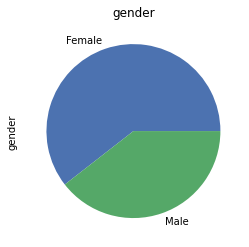

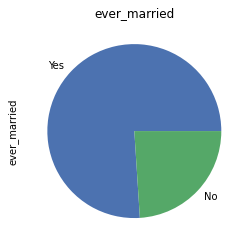

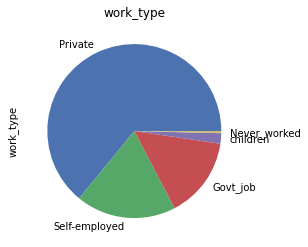

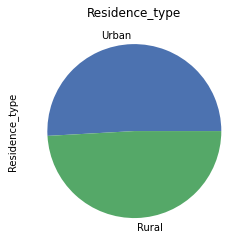

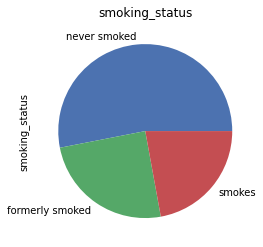

In [55]:
stroke_positive_data = data[data['stroke']==1]
for x in stroke_positive_data.select_dtypes(include=['object']).columns:
    data[x].value_counts().plot.pie()
    plt.title(x)
    plt.show()

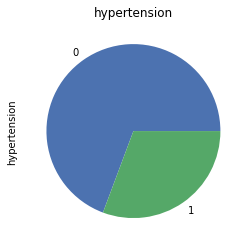

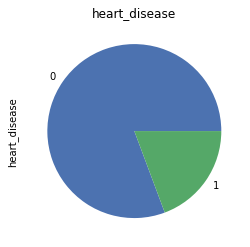

In [56]:
for x in ['hypertension','heart_disease']:
    stroke_positive_data[x].value_counts().plot.pie()
    plt.title(x)
    plt.show()

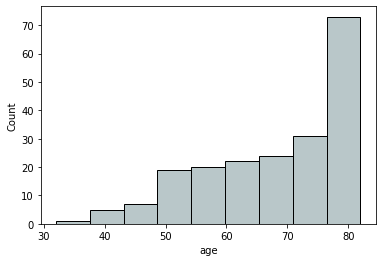

In [57]:
sns.histplot(stroke_positive_data['age'],color = randomcolor())
plt.show()

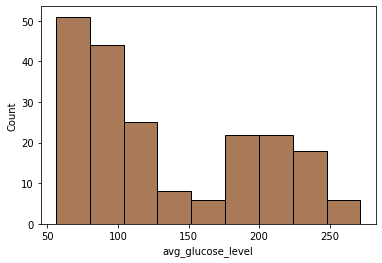

In [58]:
sns.histplot(stroke_positive_data['avg_glucose_level'],color = randomcolor())
plt.show()

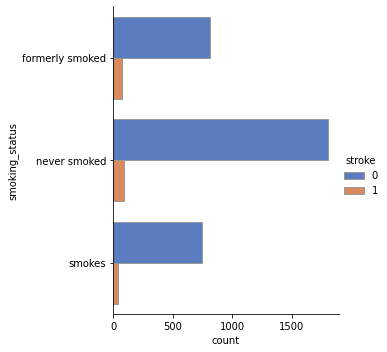

In [60]:
# Smoking to Stroke
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="muted", edgecolor=".6", data=df)
plt.show()

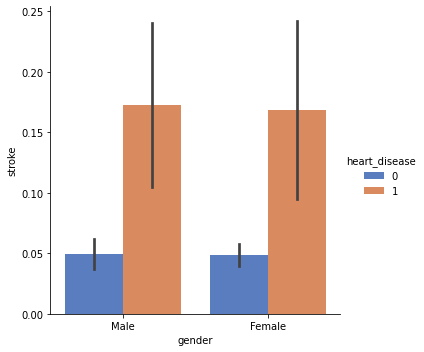

In [61]:
# Heart Disease in Gender to Stroke
sns.catplot(x="gender", y="stroke", hue="heart_disease",
            palette="muted", kind="bar", data=df)
plt.show()

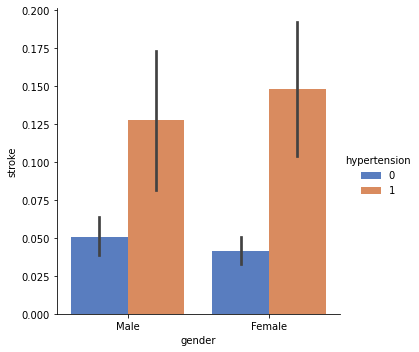

In [62]:
# Hypertension in Gender to Stroke
sns.catplot(x="gender", y="stroke", hue="hypertension",
            palette="muted", kind="bar", data=df)
plt.show()

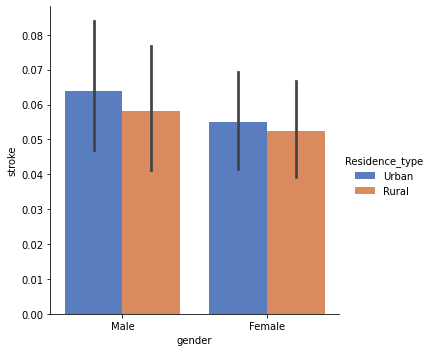

In [64]:
# Residence Type
sns.catplot(x="gender", y="stroke", hue="Residence_type",
            palette="muted", kind="bar", data=df)
plt.show()

Text(0.5, 1.0, 'Age: Stroke vs. No Stroke')

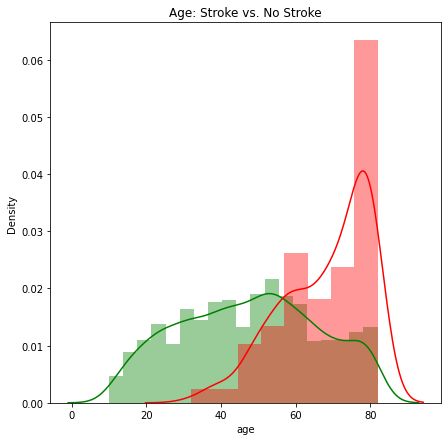

In [66]:
#Age:Stroke vs. No Stroke
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['age'], color='green')
sns.distplot(df[df['stroke'] == 1]['age'], color='red')
plt.title('Age: Stroke vs. No Stroke')

Text(0.5, 1.0, 'BMI: Stroke vs. No Stroke')

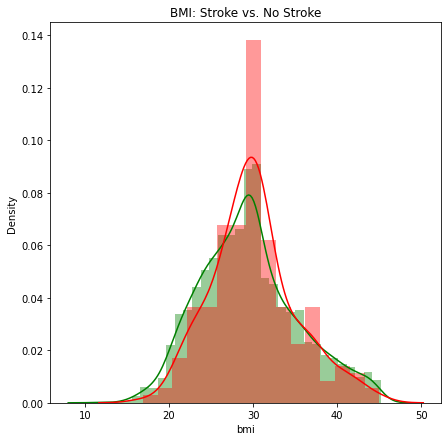

In [68]:
#BMI: Stroke vs. No Stroke
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['bmi'], color='green')
sns.distplot(df[df['stroke'] == 1]['bmi'], color='red')
plt.title('BMI: Stroke vs. No Stroke')

Text(0.5, 1.0, 'Average Glucose Level: Stroke vs. No Stroke')

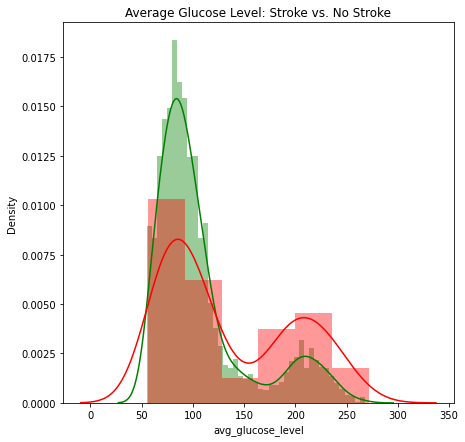

In [69]:
#Average Glucose Level: Stroke to No Stroke
plt.figure(figsize=(7, 7))
sns.distplot(df[df['stroke'] == 0]['avg_glucose_level'], color='green')
sns.distplot(df[df['stroke'] == 1]['avg_glucose_level'], color='red')
plt.title('Average Glucose Level: Stroke vs. No Stroke')

In [70]:
from sklearn.utils import resample

In [71]:
#create two different dataframe of majority and minority class 
df_majority = data[(data['stroke']==0)] 
df_minority = data[(data['stroke']==1)] 
df_majority.shape,df_minority.shape

((3363, 11), (202, 11))

In [72]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 4861, 
                                 random_state=42)  
df_minority_upsampled.shape

(4861, 11)

In [73]:
data_upsampled = pd.concat([df_minority_upsampled, df_majority])
data_upsampled.shape

(8224, 11)

In [74]:
data_upsampled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
126,Male,78.0,1,0,Yes,Self-employed,Urban,93.13,30.29235,formerly smoked,1
218,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,30.29235,smokes,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,29.40000,never smoked,1
17,Male,75.0,1,0,Yes,Private,Urban,221.29,25.80000,smokes,1
132,Male,69.0,1,0,No,Private,Rural,182.99,36.50000,never smoked,1


In [75]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
categorical = data_upsampled.select_dtypes(include=['object'])
non_categorical = data_upsampled.select_dtypes(exclude=['object'])

In [78]:
categorical.dtypes

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [79]:
non_categorical.dtypes

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [80]:
#Convert Categorical to Dummy Variables
df = pd.get_dummies(df,
                    columns=['work_type','smoking_status'],
                    prefix=['work','smoke'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,Male,67.0,0,1,Yes,Urban,228.69,36.60000,1,0,0,1,0,0,1,0,0
1,Female,61.0,0,0,Yes,Rural,202.21,30.29235,1,0,0,0,1,0,0,1,0
2,Male,80.0,0,1,Yes,Rural,105.92,32.50000,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Urban,171.23,34.40000,1,0,0,1,0,0,0,0,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.00000,1,0,0,0,1,0,0,1,0


In [81]:
#Convert Remaining Categorical to Binary
df['ever_married'] = np.where(df['ever_married'] == 'Yes', 1, 0)
df['gender'] = np.where(df['gender'] == 'Male', 1, 0)
df['Residence_type'] = np.where(df['Residence_type'] == 'Urban', 1, 0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1,67.0,0,1,1,1,228.69,36.60000,1,0,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,30.29235,1,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,0,1,0,0,1,0


In [82]:
#Feature Encoding
numerical = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1,0.961273,0,1,1,1,2.479202,1.209348,1,0,0,1,0,0,1,0,0
1,0,0.643316,0,0,1,0,1.930834,0.126744,1,0,0,0,1,0,0,1,0
2,1,1.650179,0,1,1,0,-0.063211,0.505651,1,0,0,1,0,0,0,1,0
3,0,0.007403,0,0,1,1,1.289277,0.831754,1,0,0,1,0,0,0,0,1
4,0,1.597186,1,0,1,0,1.349126,-0.953234,1,0,0,0,1,0,0,1,0


In [83]:
#Data Balancing
X = df.copy()
X = df.drop('stroke', axis=1)
y = df['stroke']

In [84]:
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [85]:
# Logistic Regression
logit = LogisticRegression(max_iter=10000)
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
logit_accuracy = accuracy_score(logit_pred, y_test)

# Random Forest
RF = RandomForestClassifier(n_estimators=25)
RF.fit(X_train, y_train)
RF.pred = RF.predict(X_test)
RF_accuracy = accuracy_score(RF.pred, y_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.pred = knn.predict(X_test)
knn_accuracy = accuracy_score(knn.pred, y_test)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
DT_pred = decision_tree.predict(X_test)
DT_accuracy = accuracy_score(DT_pred, y_test)

In [86]:
# Logistic Regression
y_pred = logit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix (Logistic Regression):\n', cm)
print('Accuracy:', logit_accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('f1 score:', f1_score(y_test, y_pred))


Confusion Matrix (Logistic Regression):
 [[508 158]
 [124 556]]
Accuracy: 0.7904903417533432
Precision: 0.7787114845938375
Recall: 0.8176470588235294
f1 score: 0.7977044476327116


In [87]:
# Random Forest
y_pred = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix (Random Forest):\n', cm)
print('Accuracy:', RF_accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('f1 score:', f1_score(y_test, y_pred))


Confusion Matrix (Random Forest):
 [[593  73]
 [ 32 648]]
Accuracy: 0.9219910846953938
Precision: 0.8987517337031901
Recall: 0.9529411764705882
f1 score: 0.9250535331905783


In [88]:
# KNN-Neighbors
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix (KNN):\n', cm)
print('Accuracy:', knn_accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('f1 score:', f1_score(y_test, y_pred))


Confusion Matrix (KNN):
 [[523 143]
 [ 24 656]]
Accuracy: 0.8759286775631501
Precision: 0.8210262828535669
Recall: 0.9647058823529412
f1 score: 0.8870858688302907


In [89]:
# Decision Tree
y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix (Decision Tree):\n', cm)
print('Accuracy:', DT_accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('f1 score:', f1_score(y_test, y_pred))


Confusion Matrix (Decision Tree):
 [[580  86]
 [ 64 616]]
Accuracy: 0.888558692421991
Precision: 0.8774928774928775
Recall: 0.9058823529411765
f1 score: 0.8914616497829233
